In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cardiotocographic.csv")

In [3]:
ncols = df.select_dtypes(include=[np.number]).columns

In [5]:
corr_matrix = df[ncols].corr()

In [6]:
print("=========== Correlation Matrix ===========")
print(corr_matrix)
print("==========================================")

=========== Correlation Matrix ===========
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0

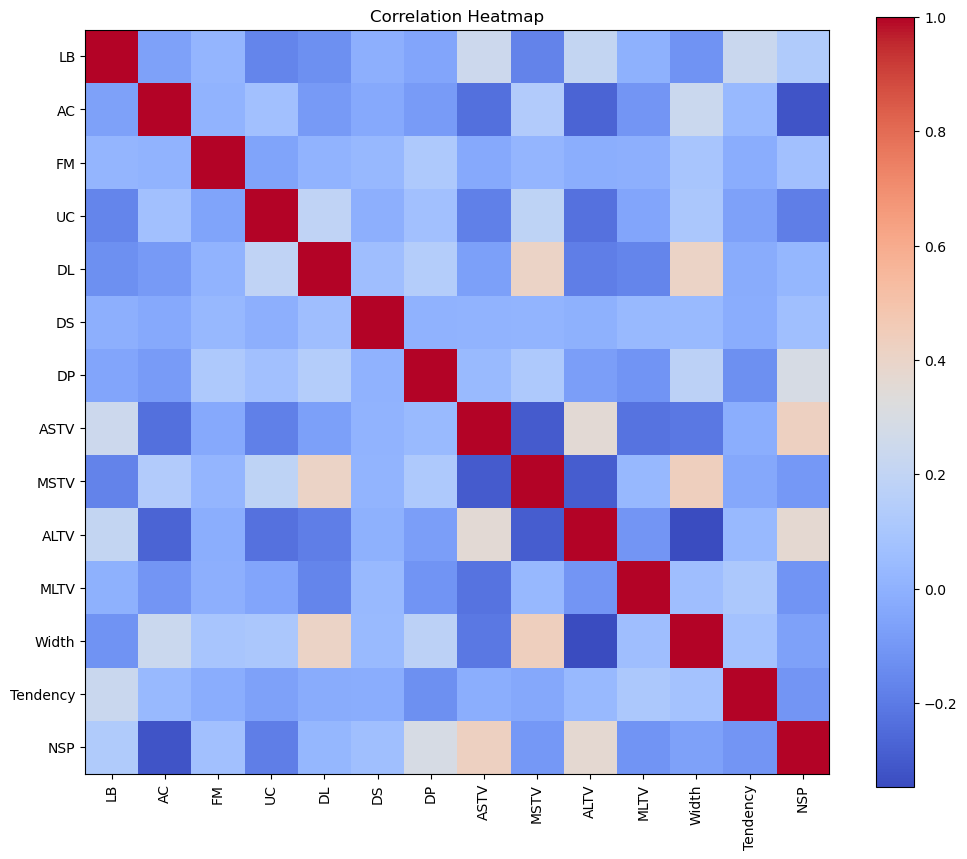

In [7]:
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(ncols)), ncols, rotation=90)
plt.yticks(range(len(ncols)), ncols)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

In [14]:

corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()

top_corr = corr_pairs.sort_values(by='abs_corr', ascending=False).head(10)

print("=========== TOP 10 STRONGEST CORRELATIONS ===========")
print(top_corr[['Variable1', 'Variable2', 'Correlation']])
print("====================================================")

=========== TOP 10 STRONGEST CORRELATIONS ===========
   Variable1 Variable2  Correlation
78      MSTV     Width     0.435393
75      ASTV       NSP     0.422652
49        DL      MSTV     0.410102
52        DL     Width     0.410031
84      ALTV       NSP     0.365846
71      ASTV      ALTV     0.357497
82      ALTV     Width    -0.346460
24        AC       NSP    -0.316941
69        DP       NSP     0.294472
70      ASTV      MSTV    -0.293882


Detected Time Columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP'] 



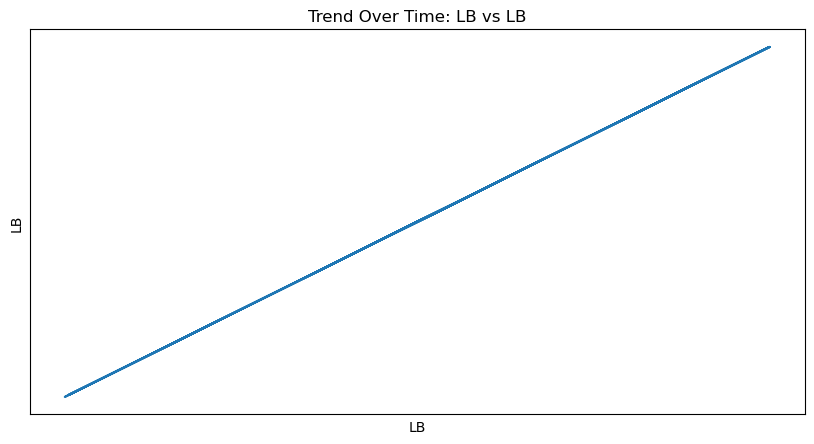

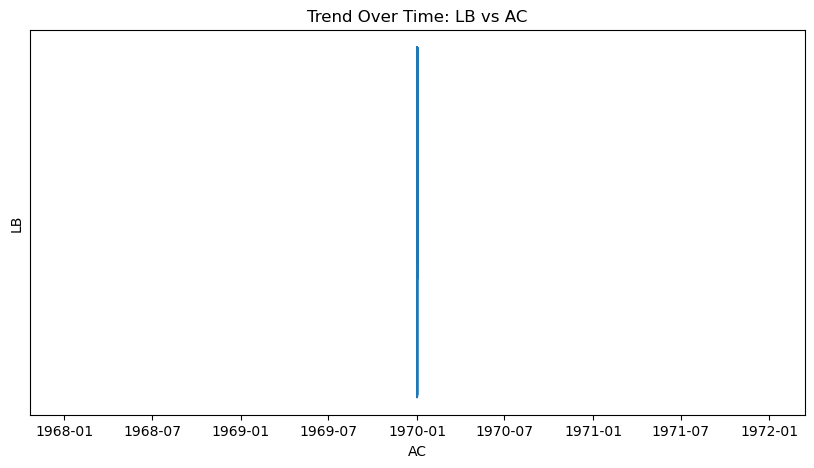

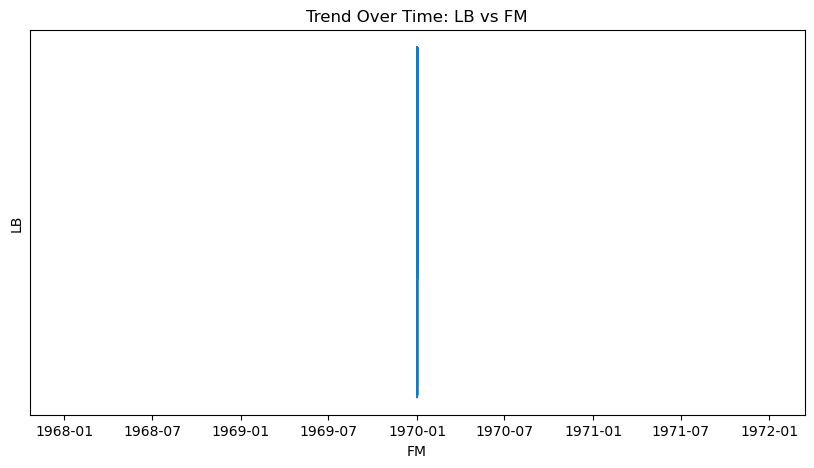

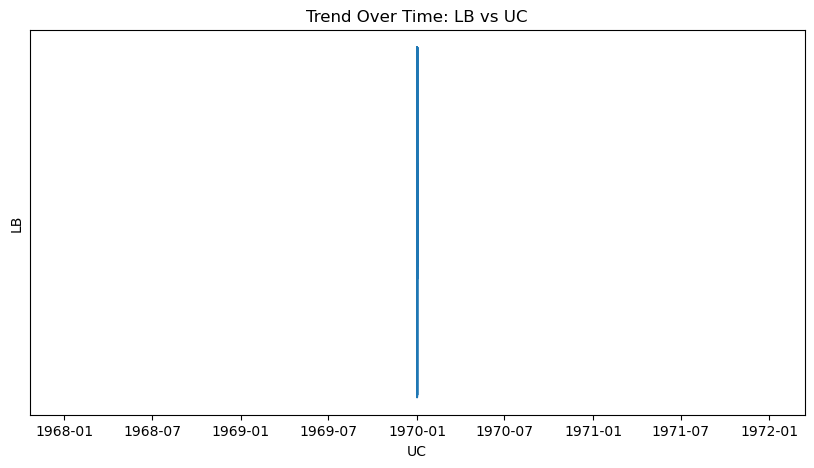

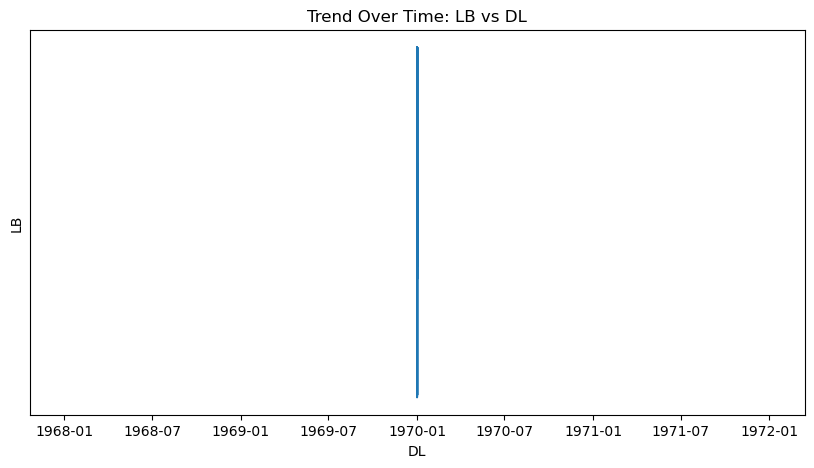

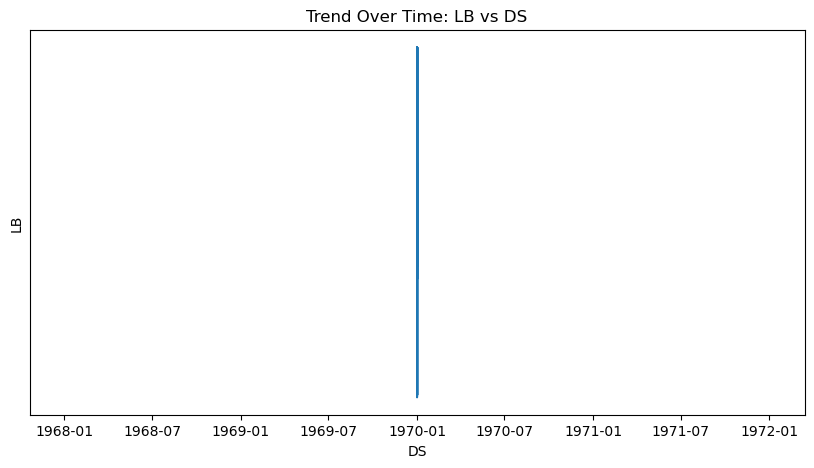

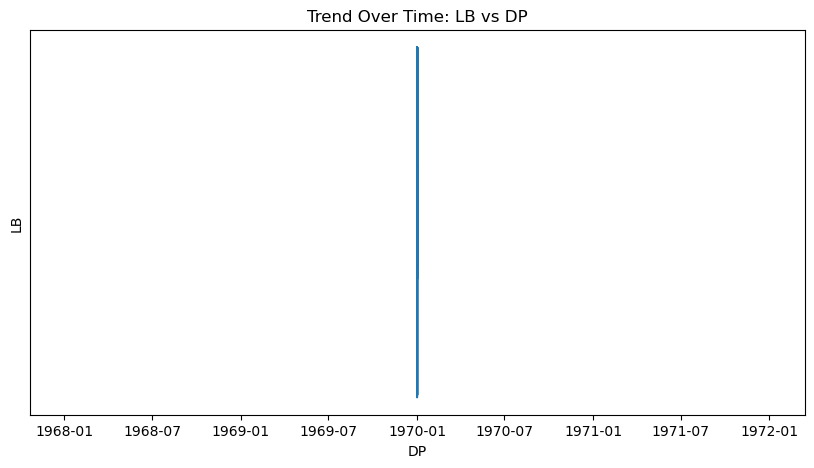

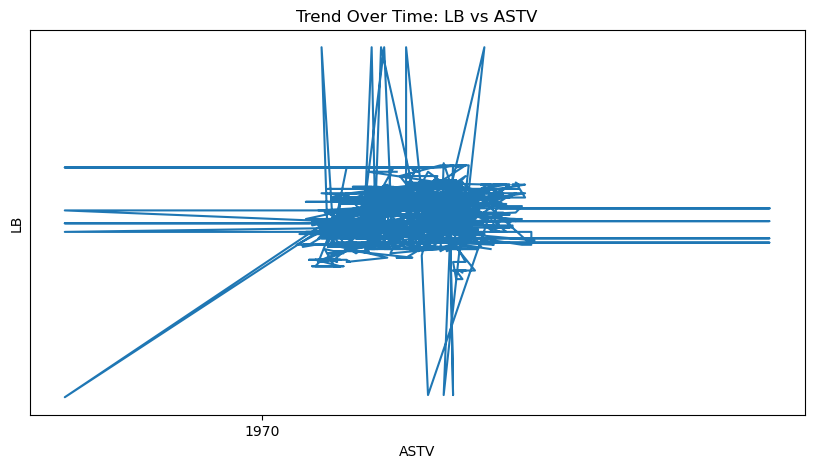

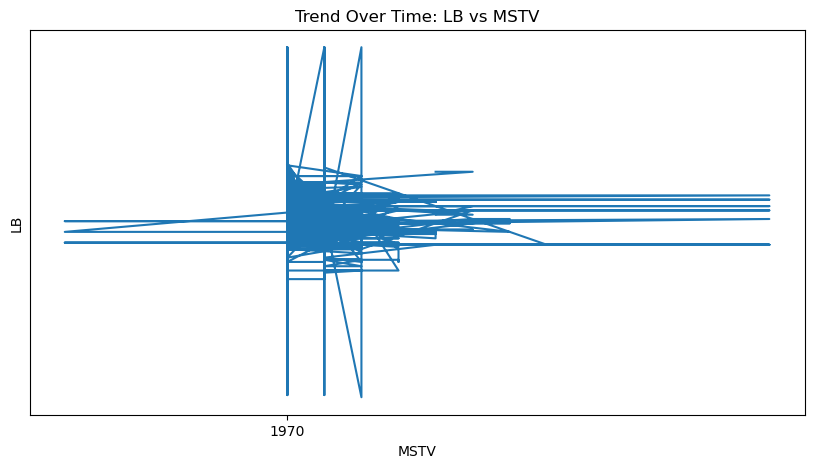

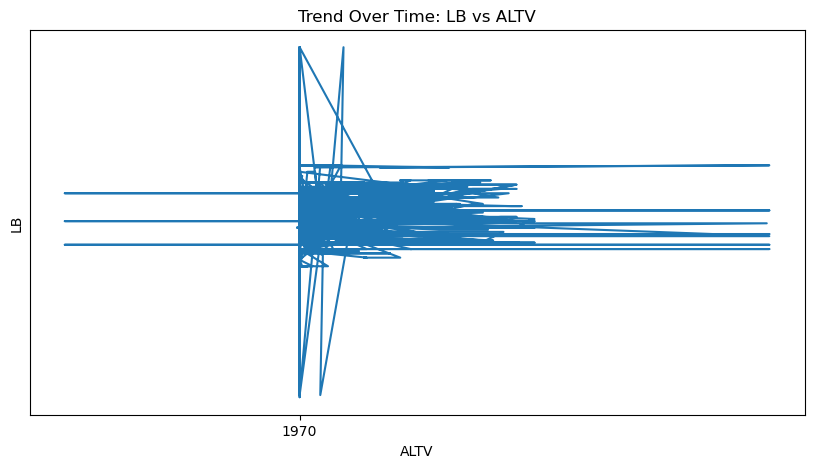

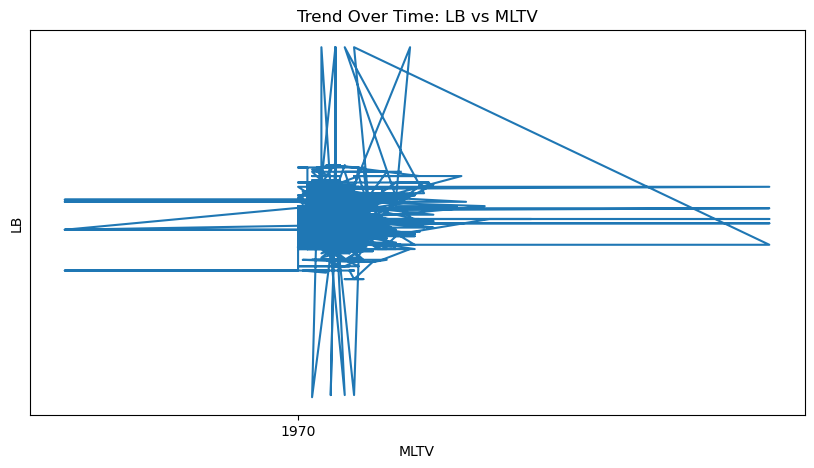

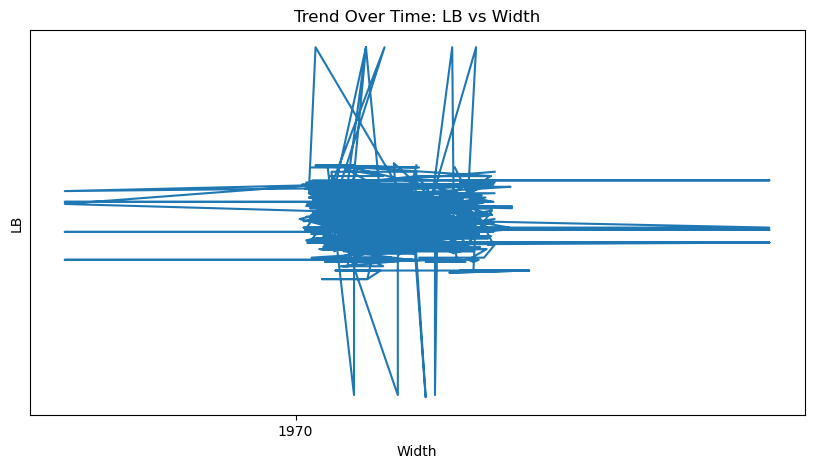

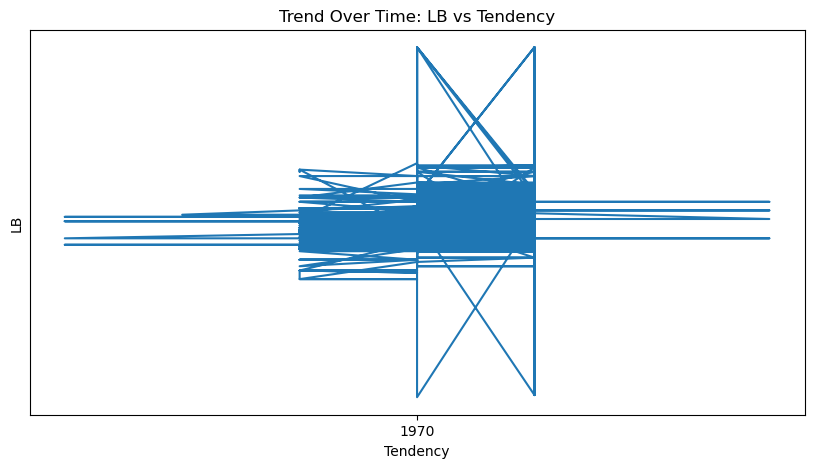

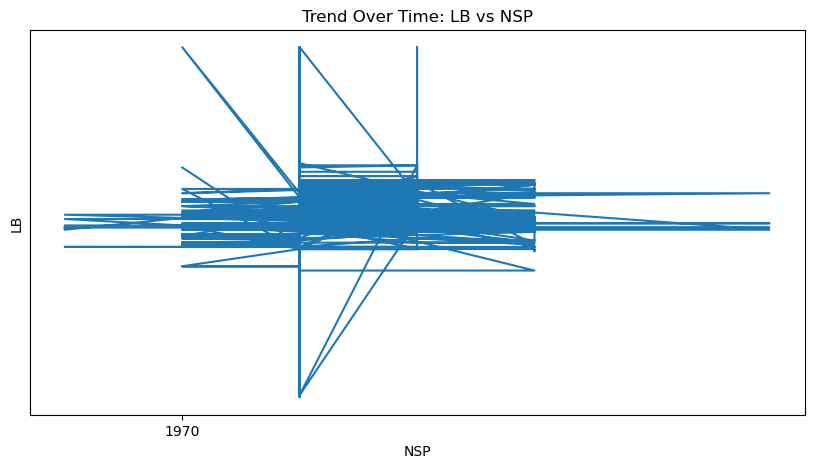

In [16]:
tcols = []
for col in df.columns:
    try:
        temp = pd.to_datetime(df[col], errors="raise")
        df[col] = temp
        tcols.append(col)
    except:
        continue

print("Detected Time Columns:", tcols, "\n")

if len(tcols) > 0:
    for col in tcols:
        plt.figure(figsize=(10, 5))
        plt.plot(df[col], df.iloc[:, 0])  # plot vs first numeric variable
        plt.xlabel(col)
        plt.ylabel(df.columns[0])
        plt.title(f"Trend Over Time: {df.columns[0]} vs {col}")
        plt.show()
else:
    print("No valid time-based data found in this dataset")